In [46]:
import subprocess
import os
import sys
import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Custom functions
sys.path.insert(1, '../..')
from utils import *

# scperturb package
sys.path.insert(1, '../../../package/src/')
from scperturb import *

%matplotlib inline

In [47]:
from pathlib import Path
figure_path = Path('../../figures/')

In [ ]:
datasets = ['PapalexiSatija2021_eccite_RNA', 'NormanWeissman2019_filtered', 'FrangiehIzar2021_RNA']

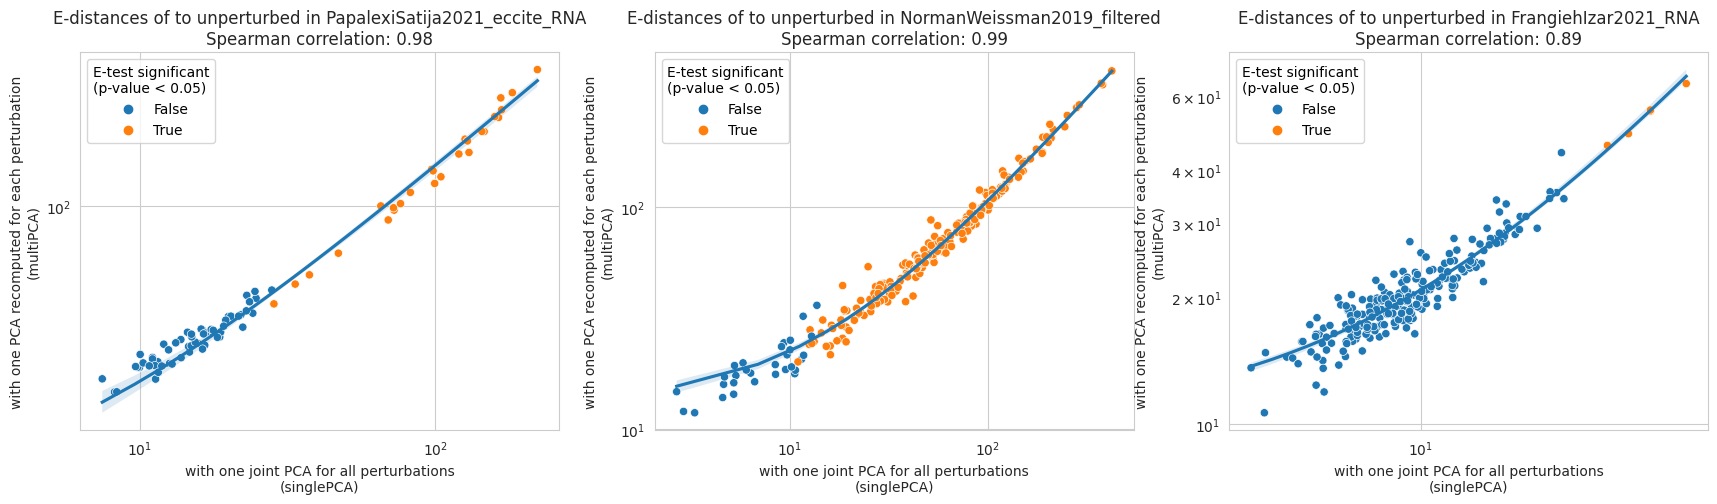

In [45]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 3, figsize=[3*7,5], dpi=100)

for ax, dataset in zip(axs, datasets):
    df = pd.read_csv(f'../snakemake/tables/effect_of_multi_vs_single_PCA_{dataset}_tables.csv', index_col=0)
    df = df.drop('control')
    
    sns.regplot(data=df, x='singlePCA', y='multiPCA', ax=ax, scatter_kws={'s': 0})
    sns.scatterplot(data=df, x=df.singlePCA, y=df.multiPCA, hue='significant_adj', ax=ax)
    from scipy.stats import spearmanr
    r = spearmanr(df.singlePCA, df.multiPCA)[0]
    ax.set_title(f'E-distances of to unperturbed in {dataset}\nSpearman correlation: {np.round(r,2)}')
    ax.set_xlabel('with one joint PCA for all perturbations\n(singlePCA)')
    ax.set_ylabel('with one PCA recomputed for each perturbation\n(multiPCA)')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend(title='E-test significant\n(p-value < 0.05)')
pl.savefig(figure_path / 'SuppFig4_singlevsmultiPCA.pdf')
pl.show()